## IDEA
hoat dong tren khong gian <= 2 chieu (R^2) nhung mot buc anh RGB la khong gian 3 chieu do vay phai reshape lai buc hinh moi tinh toan duoc

## KMEANS

[[145  77 253]
 [170  37   5]
 [126  47 250]]
[[214.15955157 189.36844113 145.89734648]
 [ 32.01472949  28.67571659  28.83694412]
 [ 45.24553222 136.58881431 143.48355291]]


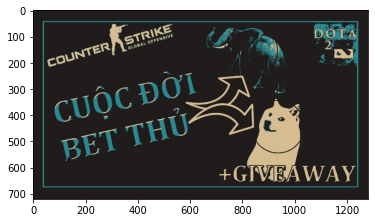

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import PIL as pil
from sklearn.cluster import KMeans

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    # height <-> row, width <-> col, depth = 3 (RGB)
    height, width, depth = img_1d.shape

    # reshape 3D -> 2D with (height * width) row and each row has 3 elements(RGB)
    reshapedIMG = img_1d.reshape(height * width, depth)

    # initial centroid with k clusters
    if init_centroids == "random":
        centroids = np.random.choice(255, size=(k_clusters, depth)) #2D array with k_cluster row, each row has width element
    elif init_centroids == "in_pixels":
        centroids = reshapedIMG[np.random.choice(height * width, k_clusters)] 

    print(centroids)
    print("=======================")

    # find the final centroids
    for _ in range(max_iter):
        # previous centroid and current newly created centroid (to check converge)
        prevCentroid = centroids

        # find the distances between pixels and centroids
        distance = np.zeros((reshapedIMG.shape[0], k_clusters))
        for k in range(k_clusters):
            distance[:,k] = np.square(np.linalg.norm(reshapedIMG - centroids[k,:], axis=1))

        # min distance
        label = np.argmin(distance, axis=1) 

        # update new centroid
        # initial the centroids array
        centroids = np.zeros((k_clusters, depth)) 
        for k in range(k_clusters):
            centroids[k,:] = np.mean(reshapedIMG[label == k,:], axis=0)
        # converge
        if np.allclose(prevCentroid, centroids, atol=2):
            break
    
    # assign centroid's value for every pixel
    for k in range(k_clusters):
        reshapedIMG[label == k, :] = centroids[k]

    # reshape the final image array in to 3D
    reshapedIMG = reshapedIMG.reshape(height, width, depth)

    return reshapedIMG, centroids
    
def main():
    # imgName = input("Enter image name: ")
    imgName = "1.jpg"
    # imgExt = input("Enter image extension: ")

    img = pil.Image.open(imgName)
    npArray = np.array(img)

    newIMG, centroids = kmeans(npArray, k_clusters=3, max_iter=3, init_centroids="random")
    
    plt.imshow(newIMG)

    print(centroids)
    # print(newIMG)


    # newImgName = imgName.partition(".")[0] + "." + imgExt
    # plt.imsave(newImgName, newIMG)

main()

# I = pil.Image.open("1.jpg")
# a = np.asarray(I,dtype=np.float32)/255
# w, h = I.size
# colors = I.getcolors(w * h)
# num_colors = len(colors) 
# num_pixels = w*h 
# x, y, z = a.shape
# a1 = a.reshape(x*y, z)
# n = 3
# k_means = KMeans(n_clusters=n)
# k_means.fit(a1)
# centroids = k_means.cluster_centers_
# labels = k_means.labels_
# a2 = centroids[labels]
# a3 = a2.reshape(x,y,z)
# plt.imshow(a3)
